In [55]:
import pandas as pd
from pymongo import MongoClient
import json
from datetime import datetime

In [56]:
client = MongoClient('mongodb://localhost:27017')
db = client.mfers_events
mfer = db.mfer

In [57]:
def parse(event):
    record = {}
    asset = event.get('asset')

    if asset == None:
        return None

    record['collection_name'] = asset['collection']['name']
    record['collection_url'] = "https://opensea.io/collection/" + asset['collection']['slug']
    record['asset_id'] = asset['id']
    record['asset_name'] = asset['name']
    record['asset_description'] = asset['description']
    record['asset_contract_date'] = asset['asset_contract']['created_date']
    record['asset_url'] = asset['permalink']
    record['asset_img_url'] = asset['image_url']
    record['event_id'] = event['id']
    record['event_time'] = event.get('created_date')
    record['event_payment_symbol'] =  None if event.get('payment_token') == None else event.get('payment_token').get('symbol')
    record['usd_price'] = None if event.get('payment_token') == None else event.get('payment_token').get('usd_price')

    decimals = 18
    if event.get('payment_token') != None:
        decimals = event.get('payment_token').get('decimals')

    price_str = event['total_price']

    try: 
        if len(price_str) < decimals:
            price_str =  "0." + (decimals-len(price_str)) * "0" + price_str
            record['event_total_price'] = float(price_str)
        else:
            record['event_total_price'] = float(price_str[:-decimals] + "." + price_str[len(price_str)-decimals:])
    except:
        print(event)

    return record

In [58]:
result = list()
for mf in mfer.find():
    for data in mf['asset_events']:
        clean_data = parse(data)

        if clean_data != None:
            result.append(clean_data)


In [59]:
df = pd.DataFrame(result)

In [60]:
df.to_csv('mfers_events.csv')

In [61]:
df

,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_time,event_payment_symbol,usd_price,event_total_price
0,mfers,https://opensea.io/collection/mfers,125193153,mfer #1192,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/pZq-cCuep9oW...,6617418045,2022-06-01T16:38:31.086860,ETH,1537.690000000000055000,1.8000
1,mfers,https://opensea.io/collection/mfers,125191634,mfer #337,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/BwIqn7qxIEp7...,6617380445,2022-06-01T16:36:36.133178,ETH,1537.690000000000055000,1.8880
2,mfers,https://opensea.io/collection/mfers,125191634,mfer #337,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/BwIqn7qxIEp7...,6617220808,2022-06-01T16:28:27.178950,WETH,1536.630000000000109000,1.6878
3,mfers,https://opensea.io/collection/mfers,125202541,mfer #6433,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/RLeNs7zcQPu0...,6616906578,2022-06-01T16:13:38.258803,ETH,1537.690000000000055000,1.9400
4,mfers,https://opensea.io/collection/mfers,125208700,mfer #8699,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/olnqBRYHYcKj...,6616606552,2022-06-01T16:00:01.056524,ETH,1537.690000000000055000,2.1000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21410,mfers,https://opensea.io/collection/mfers,125196795,mfer #3243,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/N58r-T_9qXsq...,2265581603,2021-12-01T16:45:01.275467,ETH,1555.160000000000082000,0.1940
21411,mfers,https://opensea.io/collection/mfers,125200718,mfer #5450,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/O1npiV7fhBLO...,2265550735,2021-12-01T16:43:07.234148,ETH,1555.160000000000082000,0.1800
21412,mfers,https://opensea.io/collection/mfers,125191549,mfer #359,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/mn_vyiwTeBKr...,2265550725,2021-12-01T16:43:07.209653,ETH,1555.160000000000082000,0.1900
21413,mfers,https://opensea.io/collection/mfers,125195205,mfer #2398,mfers by sartoshi,2021-11-29T22:21:12.644606,https://opensea.io/assets/ethereum/0x79fcdef22...,https://lh3.googleusercontent.com/kJjWZiyCdlJH...,2265550558,2021-12-01T16:43:06.593567,ETH,1555.160000000000082000,0.2000


In [62]:
# Start from creation to now
df = df.iloc[::-1]

In [63]:
df['time'] = pd.to_datetime(df['event_time'])


/var/folders/f3/qxtgxx_n1xsfz4jsmn1rg6tm0000gn/T/ipykernel_12196/775529030.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time'] = pd.to_datetime(df['event_time'])


In [64]:
df.set_index(['time'], inplace=True)

In [65]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

<AxesSubplot:xlabel='time'>

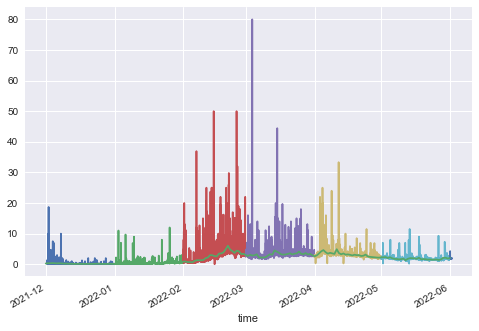

In [78]:
day_avg = df.event_total_price.resample('D').mean()
mon_avg = df.event_total_price.resample('M')
fig, ax = plt.subplots()
mon_avg.plot()
day_avg.plot()